In [ ]:
## Data Analysis File 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from textblob import TextBlob
from wordcloud import WordCloud
from nltk.corpus import stopwords
from collections import Counter
import re

In [2]:
data1=pd.read_json("corona-out-2",lines=True)
data2=pd.read_json("corona-out-3",lines=True)

In [3]:
data2 = data2[list(data1.columns)]

In [4]:
twitter_data=data1.append(data2)

/var/folders/7p/67dbkxr522v68b197j60h5g80000gn/T/ipykernel_97252/1311122475.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  twitter_data=data1.append(data2)


In [5]:
twitter_data.head()

,created_at,id,id_str,text,source,truncated,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,...,favorited,retweeted,filter_level,lang,timestamp_ms,display_text_range,extended_tweet,possibly_sensitive,extended_entities,withheld_in_countries
0,2020-04-12 18:27:25+00:00,1249403767180668930,1249403767180668928,RT @nuffsaidny: wishing death on people is wei...,"<a href=""http://twitter.com/download/iphone"" r...",False,NaN,NaN,NaN,NaN,...,False,False,low,en,2020-04-12 18:27:25.552,NaN,NaN,NaN,NaN,NaN
1,2020-04-12 18:27:25+00:00,1249403768023678982,1249403768023678976,"RT @lale_karanfil: In Turkey, there are 300 th...","<a href=""https://mobile.twitter.com"" rel=""nofo...",False,NaN,NaN,NaN,NaN,...,False,False,low,en,2020-04-12 18:27:25.753,NaN,NaN,NaN,NaN,NaN
2,2020-04-12 18:27:26+00:00,1249403769193779202,1249403769193779200,RT @umesh_agr: Thank You Sir !!\nReally thankf...,"<a href=""http://twitter.com/download/android"" ...",False,NaN,NaN,NaN,NaN,...,False,False,low,en,2020-04-12 18:27:26.032,NaN,NaN,NaN,NaN,NaN
3,2020-04-12 18:27:26+00:00,1249403769567227906,1249403769567227904,RT @meysimek: Turkey is so stubborn to change ...,"<a href=""http://twitter.com/download/android"" ...",False,NaN,NaN,NaN,NaN,...,False,False,low,en,2020-04-12 18:27:26.121,NaN,NaN,NaN,NaN,NaN
4,2020-04-12 18:27:26+00:00,1249403770435493888,1249403770435493888,RT @biannagolodryga: This image.\nThis quote.\...,"<a href=""https://mobile.twitter.com"" rel=""nofo...",False,NaN,NaN,NaN,NaN,...,False,False,low,en,2020-04-12 18:27:26.328,NaN,NaN,NaN,NaN,NaN


In [6]:
twitter_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 120434 entries, 0 to 101915
Data columns (total 37 columns):
 #   Column                     Non-Null Count   Dtype              
---  ------                     --------------   -----              
 0   created_at                 120434 non-null  datetime64[ns, UTC]
 1   id                         120434 non-null  int64              
 2   id_str                     120434 non-null  int64              
 3   text                       120434 non-null  object             
 4   source                     120434 non-null  object             
 5   truncated                  120434 non-null  bool               
 6   in_reply_to_status_id      16138 non-null   float64            
 7   in_reply_to_status_id_str  16138 non-null   float64            
 8   in_reply_to_user_id        17589 non-null   float64            
 9   in_reply_to_user_id_str    17589 non-null   float64            
 10  in_reply_to_screen_name    17589 non-null   object      

In [7]:
#Count the total number of unique users
twitter_data["user_id"] = twitter_data["user"].apply(lambda x: x["id"])

In [8]:
num_users = len(twitter_data["user_id"].unique())

In [9]:
num_users

95654

In [10]:
# Displaying the top 5 most common hashtags
hashtags = twitter_data["entities"].apply(
    lambda x: [tag["text"].lower() for tag in x["hashtags"]])

In [11]:
hashtags = hashtags.explode()

In [12]:
print(hashtags.value_counts().head())

corona         6950
25aprile       1557
mattarella     1507
coronavirus    1458
covid19        1407
Name: entities, dtype: int64


In [13]:
# We can perform a mean sentiment analysis where the 1 would stand for positive and -1 would
# stand for negative text.

# Define a function to get the sentiment polarity of a tweet
def get_tweet_sentiment(tweet):
    analysis = TextBlob(tweet)
    return analysis.sentiment.polarity

# Apply the function to the tweet text column
twitter_data['sentiment_polarity'] = twitter_data['text'].apply(get_tweet_sentiment)

# Print the average sentiment polarity of the tweets
print('Average Sentiment Polarity:', twitter_data['sentiment_polarity'].mean())

Average Sentiment Polarity: 0.024954999923896336


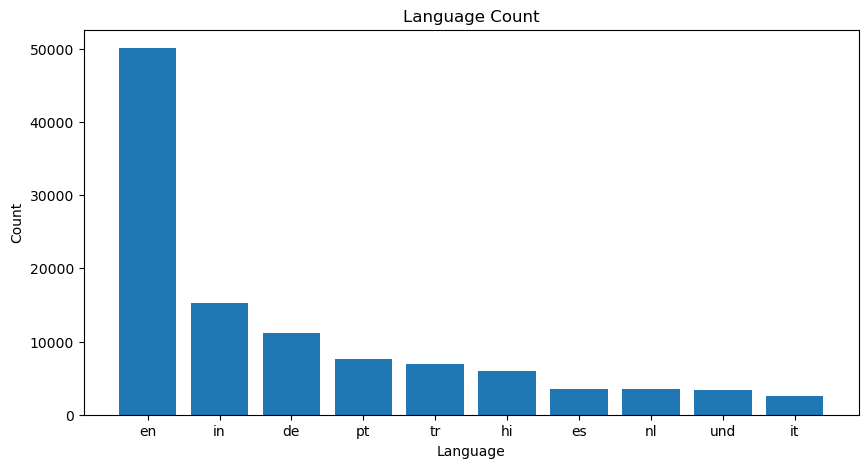

In [14]:
# Plotting the top 10 most common languages used for tweeting.
language_count = twitter_data["lang"].value_counts().head(10)

fig, ax = plt.subplots(figsize=(10, 5))
ax.bar(language_count.index, language_count.values)
ax.set_title("Language Count")
ax.set_xlabel("Language")
ax.set_ylabel("Count")

plt.show()

In [15]:
#Number of tweets in both the days for which the data has been given to us.
tweets_per_day = twitter_data.groupby(twitter_data["created_at"].dt.date).size()
print(tweets_per_day)

created_at
2020-04-12     18518
2020-04-25    101916
dtype: int64


In [16]:
# Most common words in a tweet

# Define a function to extract words from a tweet
def extract_words(text):
    words = re.findall(r'\w+', text.lower())
    return Counter(words)

# Extract the words from all the tweets
words = Counter()
for tweet in twitter_data["text"]:
    words.update(extract_words(tweet))

# Print the top 10 most common words
print(words.most_common(10))

[('rt', 72629), ('corona', 72462), ('t', 51762), ('https', 48294), ('co', 47304), ('the', 30242), ('in', 21296), ('to', 20774), ('a', 18176), ('is', 16498)]


In [17]:
# Create a function to categorize each tweet
def categorize_tweet(row):
    if isinstance(row['retweeted_status'], dict):
        return 'Retweet'
    elif isinstance(row['quoted_status'], dict):
        return 'Quoted Tweet'
    else:
        return 'Original Tweet'

# Apply the categorize_tweet function to each row of the DataFrame
twitter_data['tweet_type'] = twitter_data.apply(categorize_tweet, axis=1)

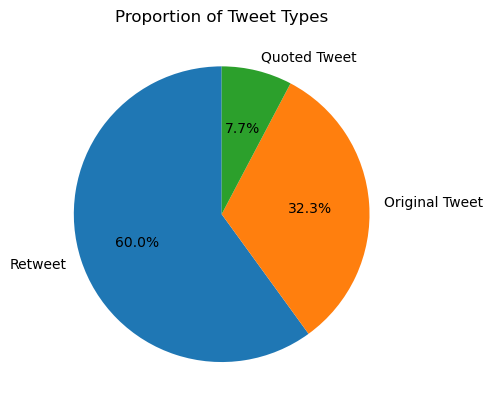

In [49]:
# Count the number of tweets for each tweet type
tweet_counts = twitter_data['tweet_type'].value_counts()

# Create a pie chart showing the proportion of each tweet type
plt.pie(tweet_counts, labels=tweet_counts.index, autopct='%1.1f%%', startangle=90)

# Add a title
plt.title('Proportion of Tweet Types')

# Display the plot
plt.show()

In [ ]:
#Find the top 10 most mentioned users in the tweets.

In [20]:
# extract usernames from the text column using regex
usernames = twitter_data['text'].apply(lambda x: re.findall(r'(?<!\w)@\w+', x))

In [21]:
# flatten the list of usernames and count their frequency
mentions_count = pd.Series([u for sublist in usernames for u in sublist]).value_counts()

In [22]:
# get the top 10 most mentioned users
top_mentions = mentions_count.head(10)

# print the top 10 most mentioned users
print(top_mentions)

@brithume           1496
@Quirinale          1465
@benwikler           987
@oxfara              846
@realDonaldTrump     817
@yalim_funda         734
@narendramodi        709
@aajtak              656
@CrazyinRussia       587
@IngrahamAngle       559
dtype: int64


In [23]:
# Convert the 'created_at' column to a datetime object
twitter_data['created_at'] = pd.to_datetime(twitter_data['created_at'])


In [24]:
# Set the 'created_at' column as the index
twitter_data.set_index('created_at', inplace=True)

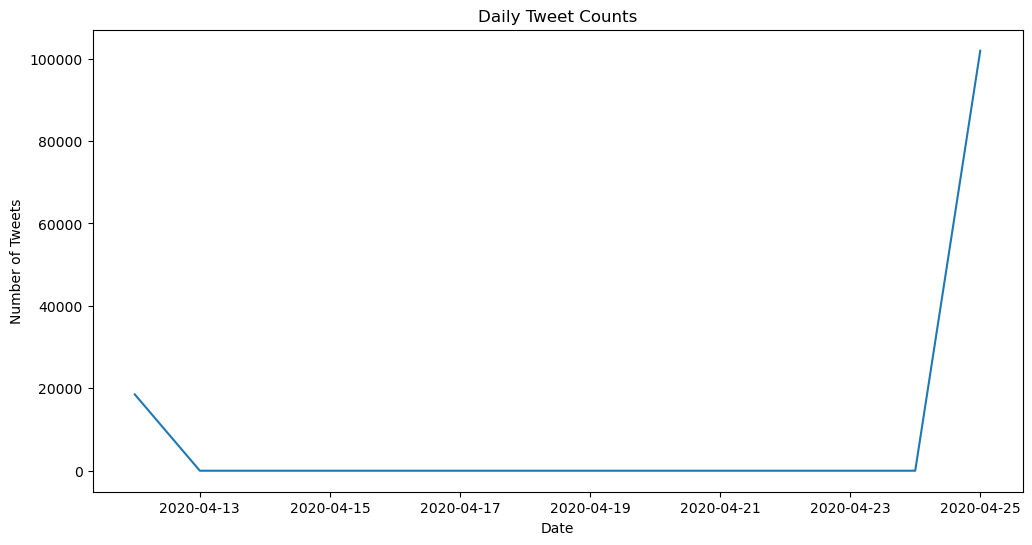

In [25]:
# Resample the data by day and count the number of tweets in each day
daily_counts = twitter_data.resample('D').size()

# Plot the daily tweet counts over time
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(daily_counts.index, daily_counts.values)
ax.set(xlabel='Date', ylabel='Number of Tweets', title='Daily Tweet Counts')
plt.show()